In [3]:
import numpy as np
import av
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
import os
import pickle
from matplotlib import patches
from functools import reduce

from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras import backend as K
!pwd

f = open("train.txt",'w')


/Users/raminanushiravani/Desktop/mouse_videos


In [38]:
 # 228x658x3
# 192x512x3
mapping = {'front':0,'back':1}
def create_training_dataset(key,target_loc):
    '''
    input files must be sorted 
    outputs a feature/label 
    count is the frame number
    '''
    labels = []
    string_to_write = key
    loc_dict = which_paw(target_loc)
    if loc_dict:
        indicies = loc_dict.keys()
        yep = 1
        for index in indicies:
            label = np.array(target_loc)[index]
            xmin = label[0,0]
            ymin = label[0,1]
            winX = label[1,0]
            winY = label[1,1]
            xmax = min(xmin + winX,658)
            ymax = min(ymin + winY,228)
            location_name = loc_dict[index]
            if location_name != 'unk':
                location_name_index = mapping[location_name]
                if location_name == 'back':
                    label = [xmin-25,ymin-5,xmax+15,ymax+20,location_name_index] 
                else:
                    label = [xmin-5,ymin-5,xmax+5,ymax+15,location_name_index] 

                string_to_write += " " + str(xmin) + "," + str(ymin) + "," + str(xmax) + "," + str(ymax) + "," + str(location_name_index)
            else: 
                yep = 0

        if yep:
            f.write(string_to_write + '\n')
            
    
    
def which_paw(locations):
    thr = 80
    xs = []
    ys = []
    for label in locations:
        xx = label[0][0]
        yy = label[0][1]
        xs.append(xx)
        ys.append(yy)
        
    sortedx = sorted(xs)
    sortedy = sorted(ys)
    if len(sortedx):
        if len(sortedx) == 1:
            label_index_0 = xs.index(sortedx[0])
            return {label_index_0 : 'unk'}

        label_index_0 = xs.index(sortedx[0])
        label_index_1 = xs.index(sortedx[1])

        if len(sortedx) == 2:
            if -sortedx[0] +  sortedx[1] > thr:
                return {label_index_0 : 'front', label_index_1 : 'back'}
            else: 
                return {label_index_0 : 'unk', label_index_1 : 'unk'}

        if len(sortedx) == 3:
            label_index_0 = xs.index(sortedx[0])
            label_index_1 = xs.index(sortedx[1])
            label_index_2 = xs.index(sortedx[2])
            if -sortedx[0] +  sortedx[1] > thr and -sortedx[0] +  sortedx[2] > thr :
                return {label_index_0 : 'front', label_index_1 : 'back', label_index_2 : 'back'}
            elif -sortedx[0] +  sortedx[1] < thr and -sortedx[0] +  sortedx[2] > thr: 

                return {label_index_0 : 'front', label_index_1 : 'front', label_index_2 : 'back'}
            else:
                return {label_index_0 : 'unk', label_index_1 : 'unk', label_index_2 : 'unk'}

def plot_image_bounds(image_data,locations):
    
    '''
    plot image boundaries
    '''
    rects = []
    loc_dict = which_paw(locations)
    indicies = loc_dict.keys()
    for index in indicies:
        label = np.array(locations)[index]
        
            
        xx = label[0,0]
        yy = label[0,1]
        winX = label[1,0]
        winY = label[1,1]
        location_name = loc_dict[index]
        
        if location_name == 'back':
            xx = xx - 25
            yy = yy - 5
            winX = winX + 40
            winY = winY + 25
        else:
            xx = xx - 5
            yy = yy - 5
            winX = winX + 10
            winY = winY + 20
            
        rect = patches.Rectangle((xx,yy),winX,winY, edgecolor='r', facecolor="none",label=location_name)
        rects.append(rect)
    figure, ax = plt.subplots(1,figsize=(40,40))
    ax.imshow(image_data)
    
    for rect in rects:
        ax.add_patch(rect)
        rx, ry = rect.get_xy()
        cx = rx + rect.get_width()/2.0
        cy = ry + rect.get_height()/2.0
        ax.annotate(rect.get_label(), (cx, cy), color='black', fontsize=25, ha='center', va='center')

    plt.show()



In [6]:
# Create training dataset
path = "/Users/raminanushiravani/Desktop/mouse_videos"
frames = pickle.load(open(path  + '/walking_frames_w_paw_location.pickle','rb'))

for key in frames.keys():
    print(key )
    target_locations = frames[key]
    create_training_dataset(key,target_locations)
        

In [48]:
frames['/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1003.jpg']

[((475, 60), (20, 20)), ((550, 170), (30, 20))]

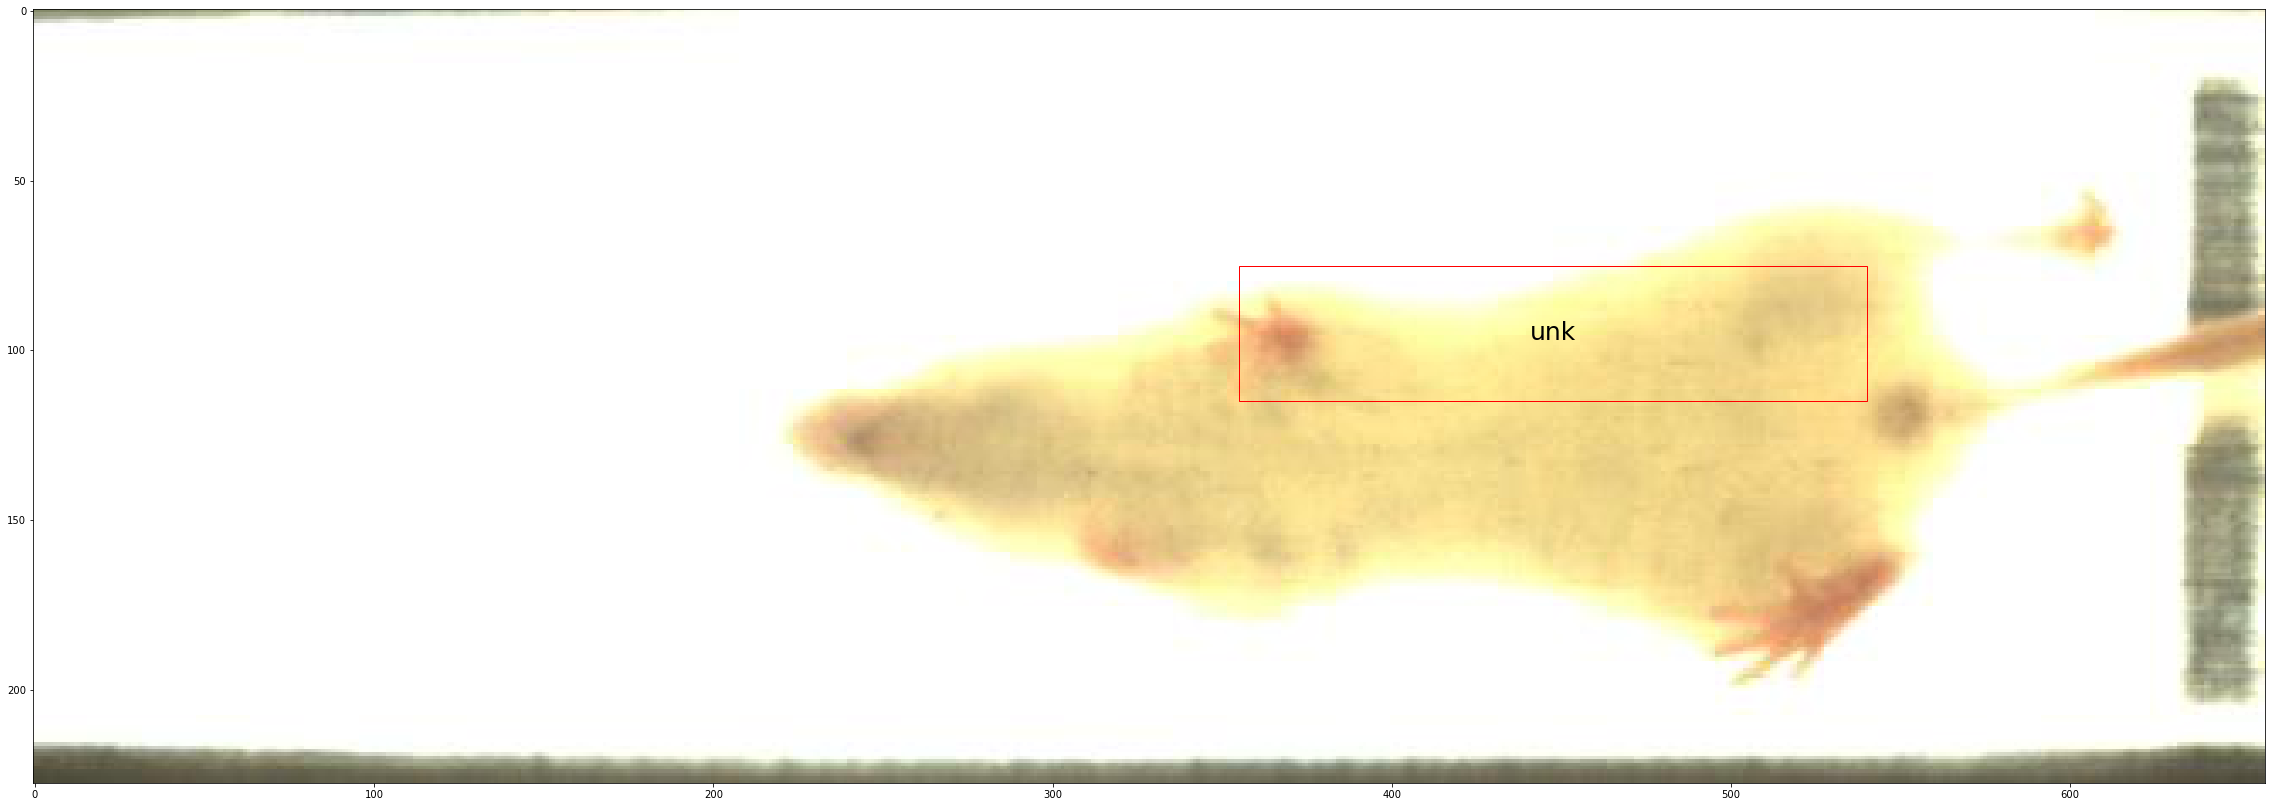

In [75]:
# visualize 
image_path = '/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1445.jpg'
image_data = plt.imread(image_path)
locations = frames[image_path]
plot_image_bounds(image_data,locations)

In [ ]:
# butthole pattern (208, 174, 113) (200,160,100)

array([[[241, 209, 134],
        [236, 204, 131],
        [231, 197, 125],
        [227, 193, 121],
        [219, 190, 124],
        [211, 182, 116],
        [206, 175, 111],
        [208, 174, 113],
        [210, 174, 116],
        [212, 173, 118],
        [215, 174, 120],
        [220, 179, 125],
        [217, 176, 122],
        [220, 179, 123],
        [227, 187, 128],
        [236, 198, 135],
        [245, 207, 142],
        [249, 214, 146],
        [250, 217, 146],
        [250, 218, 145]],

       [[234, 202, 127],
        [230, 196, 124],
        [225, 191, 119],
        [224, 187, 116],
        [211, 184, 117],
        [204, 174, 110],
        [198, 166, 105],
        [198, 164, 103],
        [200, 164, 106],
        [203, 164, 109],
        [207, 167, 115],
        [213, 172, 120],
        [211, 170, 118],
        [214, 173, 119],
        [221, 180, 124],
        [231, 191, 130],
        [240, 202, 139],
        [244, 209, 141],
        [246, 212, 141],
        [246, 212, 141]

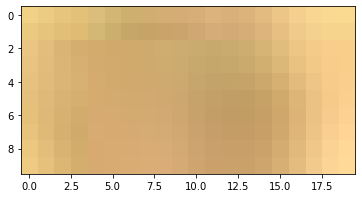

In [59]:
plt.imshow(image_data[110:120,540:560,:])
image_data[110:120,540:560,:]

In [140]:
f = open("train.txt",'r').readlines()
np.random.shuffle(f)
samples = f[0:5000]
ff = open("train_mouse.txt",'w')

for s in samples: 
    ff.write(s)
    
ff.close()


['/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/187.jpg 100,90,130,110,0 255,140,275,160,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4035.jpg 60,90,95,110,0 265,160,320,180,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5371.jpg 395,50,440,70,0 630,90,650,110,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/4566.jpg 95,80,125,100,0 225,120,270,140,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1394.jpg 180,70,205,90,0 355,140,380,160,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9743.jpg 70,50,95,70,0 145,80,185,100,0 190,130,215,150,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/1749.jpg 60,60,90,80,0 225,120,270,140,